In [1]:
from sklearn.datasets import load_digits

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import warnings
from sklearn.exceptions import ConvergenceWarning

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, f1_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

Space Invaders	(Arcade)
PAC-MAN	(Arcade)
Donkey Kong	(Arcade)
Pitfall!	(Atari)
Mario Bros.	(NES)
The Legend of Zelda	(NES)
Tetris	(GameBoy)
Dig Dug	(Arcade)
Blockout	(Arcade)
Frogger	(Arcade)
Kung Fu	(NES)
Asteroids	(Arcade)
Joust	(Arcade)
Gun.Smoke	(NES)
Combat	(Atari)
Spy Hunter	(NES)
Gauntlet	(Arcade)
1942	(Arcade)
	
Double Dragon	(NES)
Altered Beast	(Arcade)
River City Ransom	(NES)
Prince of Persia	(PC)


In [2]:
data, labels = load_digits(return_X_y=True)
data.shape, labels.shape

((1797, 64), (1797,))

In [3]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.3, shuffle=True, random_state=0)
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((1257, 64), (1257,), (540, 64), (540,))

In [4]:
def accuracy(pred, real):
    return np.sum( pred == real )/pred.size

# First Experiment

In [5]:
model_gauss = GaussianNB()
model_regression = LogisticRegression()
model_tree = DecisionTreeClassifier()

values = dict()
cf_matrices = dict()

### Gauss model

In [6]:
model_gauss.fit(train_data, train_labels)
pred_labels = model_gauss.predict(test_data)
acc = accuracy(pred_labels, test_labels)
f1 = f1_score(pred_labels,test_labels,average='macro')
cf_matrices['Gauss'] = confusion_matrix(pred_labels,test_labels)
values['Gauss'] = {'Acc':acc, 'Macro-f1':f1}
print(f'Accuracy: {acc}  Macro-F1: {f1}')

Accuracy: 0.8240740740740741  Macro-F1: 0.8241827842292786


### Logistic Regression model

In [7]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    model_regression.fit(train_data, train_labels)
pred_labels = model_regression.predict(test_data)
acc = accuracy(pred_labels, test_labels)
f1 = f1_score(pred_labels,test_labels,average='macro')
cf_matrices['Logistic-regression'] = confusion_matrix(pred_labels,test_labels)
values['Logistic-regression'] = {'Acc':acc, 'Macro-f1':f1}
print(f'Accuracy: {acc}  Macro-F1: {f1}')

Accuracy: 0.9537037037037037  Macro-F1: 0.955208755711063


### Decision Tree model

In [8]:
model_tree.fit(train_data, train_labels)
pred_labels = model_tree.predict(test_data)
acc = accuracy(pred_labels, test_labels)
f1 = f1_score(pred_labels,test_labels,average='macro')
cf_matrices['Decision-Tree'] = confusion_matrix(pred_labels,test_labels)
values['Decision-Tree'] = {'Acc':acc, 'Macro-f1':f1}
print(f'Accuracy: {acc}  Macro-F1: {f1}')

Accuracy: 0.85  Macro-F1: 0.8518560931985416


In [9]:
df_metrics = pd.DataFrame(values)
df_metrics

,Gauss,Logistic-regression,Decision-Tree
Acc,0.824074,0.953704,0.850000
Macro-f1,0.824183,0.955209,0.851856


<AxesSubplot:>

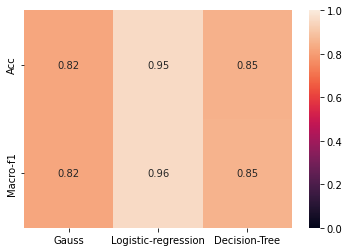

In [10]:
sb.heatmap(df_metrics, annot=True, vmin=0, vmax=1)

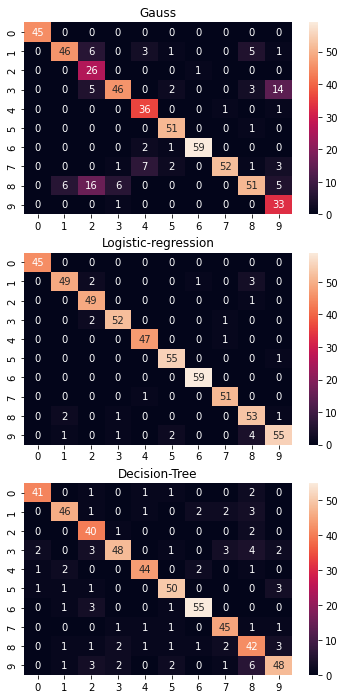

In [11]:
fig, axs = plt.subplots(3, figsize=(6,12))
for i, key in enumerate(cf_matrices.keys()):
    sb.heatmap(cf_matrices[key], annot=True, ax=axs[i])
    axs[i].set_title(key)

# Second Experiment

In [12]:
kf = KFold(n_splits=30, random_state=0, shuffle=True)
values = dict()
for i, (train_idx, test_idx) in enumerate(kf.split(data)):
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning)
        train_data, train_labels = data[train_idx,:], labels[train_idx]
        test_data, test_labels = data[test_idx,:], labels[test_idx]
        model_gauss, model_regression, model_tree = GaussianNB(), LogisticRegression(), DecisionTreeClassifier()
        model_gauss.fit(train_data, train_labels)
        model_regression.fit(train_data, train_labels)
        model_tree.fit(train_data, train_labels)
        values[f'It {i+1}'] = {
            'Gauss': f1_score( model_gauss.predict(test_data) ,test_labels,average='macro'),
            'LogisticRegression': f1_score( model_regression.predict(test_data) ,test_labels,average='macro'),
            'DecisionTree': f1_score( model_tree.predict(test_data) ,test_labels,average='macro')
        }

In [13]:
df_f1 = pd.DataFrame(values)
df_f1 = df_f1.T
df_f1.head()

,Gauss,LogisticRegression,DecisionTree
It 1,0.941424,1.000000,0.888663
It 2,0.816835,0.940955,0.833409
It 3,0.713413,0.965959,0.893598
It 4,0.806752,0.946911,0.838388
It 5,0.814630,1.000000,0.859679


In [14]:
index = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
columns = df_f1.columns
nDatos = len(columns)
nStats = len(index)
values = np.zeros((nDatos, nStats))
for i,column in enumerate(columns):
    values[i] = df_f1[column].describe().to_numpy()
values = values.T
df_stats = pd.DataFrame(values, index=index, columns=columns)
df_stats

,Gauss,LogisticRegression,DecisionTree
count,30.000000,30.000000,30.000000
mean,0.833999,0.959923,0.858934
std,0.049738,0.022879,0.033853
min,0.713413,0.917893,0.794199
25%,0.793210,0.945981,0.834828
50%,0.840605,0.955977,0.859050
75%,0.865529,0.975195,0.877972
max,0.941424,1.000000,0.928904


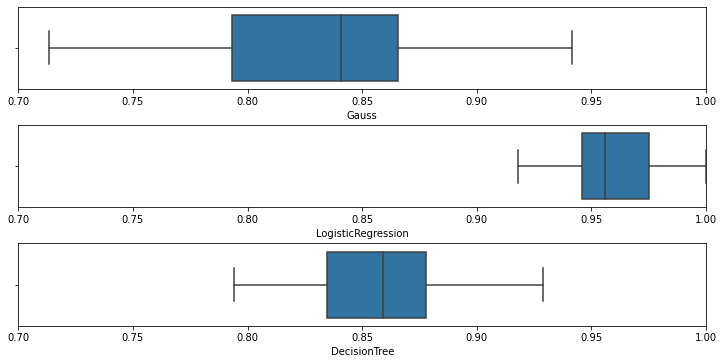

In [41]:
with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=FutureWarning)
        fig, axs = plt.subplots(3, figsize=(10,5)) 
        for i, key in enumerate(df_f1.columns):
                sb.boxplot(df_f1[key], ax=axs[i])
                # axs[i].set_title(key)
        for i, key in enumerate(df_f1.columns):
                axs[i].set_xlim([0.7,1.0])
fig.tight_layout(pad=0.5)
plt.show()

# Conclusions

By the results, we can conclude that the Logistic Regression model is more constant and provides better results than the other 2 models.

In both experiments, this model shows a better perfomance being more constant than the others, and always reaching higher metrics.

Looking at the results, Gaussian and TreeDecision models showed almost the same performance, as their metrics values always being between 0.9 and 0.75, with a few exceptions. 

At the confussion matrices, we can see that Gaussian model was who struggle the most, as it struggles a lot when classifing 9 and 2. The other two models seems to work better but with Logistic Regression having better results.

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>Gauss</th>      <th>LogisticRegression</th>      <th>DecisionTree</th>    </tr>  </thead>  <tbody>    <tr>      <th>count</th>      <td>30.000000</td>      <td>30.000000</td>      <td>30.000000</td>    </tr>    <tr>      <th>mean</th>      <td>0.833999</td>      <td>0.959923</td>      <td>0.849276</td>    </tr>    <tr>      <th>std</th>      <td>0.049738</td>      <td>0.022879</td>      <td>0.038216</td>    </tr>    <tr>      <th>min</th>      <td>0.713413</td>      <td>0.917893</td>      <td>0.737611</td>    </tr>    <tr>      <th>25%</th>      <td>0.793210</td>      <td>0.945981</td>      <td>0.824747</td>    </tr>    <tr>      <th>50%</th>      <td>0.840605</td>      <td>0.955977</td>      <td>0.851650</td>    </tr>    <tr>      <th>75%</th>      <td>0.865529</td>      <td>0.975195</td>      <td>0.876353</td>    </tr>    <tr>      <th>max</th>      <td>0.941424</td>      <td>1.000000</td>      <td>0.912159</td>    </tr>  </tbody></table>

We can see that the distribution of the values is better in the Logistic method. The mean is higher, and even the min value is higher that most of the values on the other models.